# 3. Plotting with Pandas

### Objectives
1. Plot directly with a DataFrame or Series object with the **`plot`** method


### Resources
1. [Pandas Visualization documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

# Plotting in Pandas
Pandas makes plotting easy by automating much of the procedure for you. All pandas plotting passes through Python's main visualization library, **matplotlib** and is accessed through the DataFrame.plot or Series.plot method. We say that the pandas `plot` method is a 'wrapper' for matplotlib.

For plots to be embedded in the notebook, you must run the magic command **`%matplotlib inline`**

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline 

In [17]:
req = requests.get('https://api.iextrading.com/1.0/stock/AMZN/chart/5y')
amzn = pd.read_json(req.text)
amzn.head()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-2.99,0.000000,-0.810,366.18,2013-11-18,373.49,"Nov 18, 13",364.67,370.28,2738214,2738214,369.1979
1,-1.24,-0.003386,-0.339,364.94,2013-11-19,368.78,"Nov 19, 13",362.50,365.82,1904797,1904797,365.8149
2,-2.37,-0.009859,-0.649,362.57,2013-11-20,367.56,"Nov 20, 13",360.45,367.56,1772984,1772984,364.2907
3,6.35,0.007483,1.751,368.92,2013-11-21,369.25,"Nov 21, 13",363.30,364.05,1967041,1967041,367.5986
4,3.39,0.016740,0.919,372.31,2013-11-22,374.50,"Nov 22, 13",366.31,370.00,2967833,2967833,371.7863


In [18]:
amzn = amzn.set_index('date')
amzn_close = amzn['close']
amzn_close.head()

date
2013-11-18    366.18
2013-11-19    364.94
2013-11-20    362.57
2013-11-21    368.92
2013-11-22    372.31
Name: close, dtype: float64

## Plotting a Series
Pandas uses the Series index as the x-values and the values as y-values. By default, Pandas creates a line plot. Let's plot Amazon's closing price for the last 5 years.

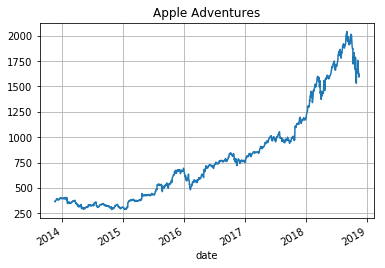

In [19]:
am=amzn_close.plot(grid=id =True, title="Apple Adventures")

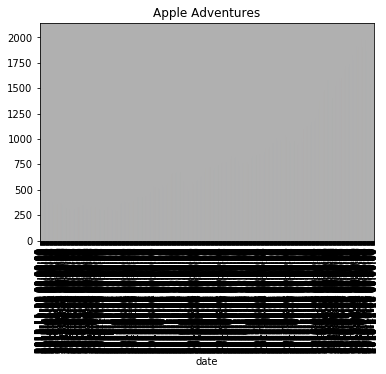

In [24]:
ab=amzn_close.plot(grid =True, title="Apple Adventures")


Get data from Apple, Facebook, Schlumberger and Tesla since beginning of 2014

In [25]:
symbols = ['AAPL', 'FB', 'SLB', 'TSLA', 'AMZN']

In [26]:
stock_dict = {}
for symbol in symbols:
    stock = pd.read_json(f'https://api.iextrading.com/1.0/stock/{symbol}/chart/5y').set_index('date')
    stock_dict[symbol] = stock['close']

In [27]:
df = pd.DataFrame(stock_dict)
df.head()

,AAPL,FB,SLB,TSLA,AMZN
date,,,,,
2013-11-18,67.9977,45.83,81.4699,121.58,366.18
2013-11-19,68.1184,46.36,80.8148,126.09,364.94
2013-11-20,67.5219,46.43,80.0799,121.11,362.57
2013-11-21,68.3264,46.70,80.5757,122.10,368.92
2013-11-22,68.1512,46.23,82.0985,121.38,372.31


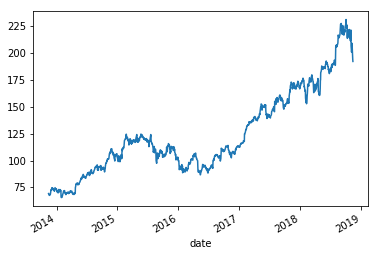

In [14]:
aapl = df['AAPL']
aapl.plot()

In [ ]:
#index is the date, values are the y

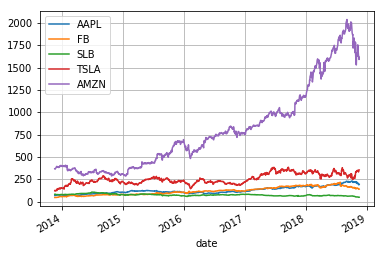

In [28]:
df.plot(grid=True)

In [57]:
symbols = ['AAPL', 'FB', 'SLB', 'TSLA']

In [58]:
stock_dict = {'AMZN': amzn_close}
for symbol in symbols:
    req = requests.get(f'https://api.iextrading.com/1.0/stock/{symbol}/chart/5y')
    stock = pd.read_json(req.text).set_index('date')
    stock_dict[symbol] = stock['close']

In [59]:
df_stocks = pd.DataFrame(stock_dict)
df_stocks.head()

,AMZN,AAPL,FB,SLB,TSLA
date,,,,,
2013-11-18,366.18,67.9977,45.83,81.4699,121.58
2013-11-19,364.94,68.1184,46.36,80.8148,126.09
2013-11-20,362.57,67.5219,46.43,80.0799,121.11
2013-11-21,368.92,68.3264,46.70,80.5757,122.10
2013-11-22,372.31,68.1512,46.23,82.0985,121.38


## Plot all Series one at a time
All calls to plot that happen in the same cell will be drawn on the same Axes unless otherwise specified.

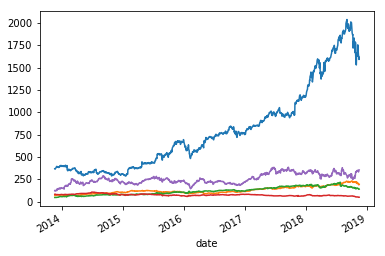

In [60]:
df_stocks['AMZN'].plot()
df_stocks['AAPL'].plot()
df_stocks['FB'].plot()
df_stocks['SLB'].plot()
df_stocks['TSLA'].plot()

## Plot all all at once from the DataFrame
Instead of individually plotting Series, we can plot each column in the DataFrame at once with its **`plot`** method.

In [ ]:
df_stocks.plot()

# Plotting in Pandas is Column based
The most important thing to know about plotting in pandas is that it is **column based**. Pandas plots each column, one at a time. It uses the index as the x-values for each column and the values of each column as the y-values. The column names will be put in the **legend**.

## Choosing other types of plots
Pandas directly uses Matplotlib for all of its plotting. Pandas does not have any plotting capabilities on its own. Pandas is simply calling Matplotlib's plotting functions and supplying the arguments for you. The types of available plots may be seen in [visualization section of the docs][1]. Use the **`kind`** parameter to set the type of plot.

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot

[1]: http://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plots

### Histogram of the closing prices of Apple

In [ ]:
# Lets create a histogram of a Series
aapl = df_stocks['AAPL']
aapl.plot(kind='hist')

### Kernel Density Estimate
Very similar to a histogram, shows the approximate probability as area under the curve.

In [ ]:
aapl.plot('kde');

## Additional Plotting Arguments
To modify plots to your liking, matplotlib gives you lots of power. The most commonly used arguments are listed below but thre are [lots more](http://matplotlib.org/api/pyplot_api.html)

* **`linestyle`** (ls) - Pass a string of one of the following ['--', '-.', '-', ':']
* **`color`** (c) - Can take a string of a named color, a string of the hexadecimal characters or a rgb tuple with each number between 0 and 1. [Check out this really good stackoverflow post to see the colors](http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
* **`linewidth`** (lw) - controls thickness of line. Default is 1
* **`alpha`** - controls opacity with a number between 0 and 1
* **`figsize`** - a tuple used to control the size of the plot. (width, height) 
* **`legend`** - boolean to control legend

In [ ]:
# Use several of the additional plotting arguemnts
aapl.plot(color="darkblue", 
          linestyle='--', 
          figsize=(16, 8), 
          linewidth=5, 
          alpha=.7, 
          legend=True)

#add a title
plt.title("AAPL Stock Price - Last 5 Years", fontsize=20);

# Plots still Ugly?
If you can't get a plot to look how you would like, you can freely choose from several predefined layouts. These layouts can instantly make your plots more attractive. You set these styles in matplotlib.

In [ ]:
# lets look at some styles we can choose from
print(plt.style.available)

In [ ]:
# lets use a popular style - ggplot
plt.style.use('ggplot')

In [ ]:
df_stocks.plot(figsize=(12, 6))

In [74]:
import pandas as pd
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])
emp.head()

,title,dept,salary,race,gender,hire_date
0,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03
1,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08
2,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black,Male,1984-11-26
3,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,2012-03-26
4,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,2013-11-04


## New Dataset
A popular intro dataset for the famous **`ggplot2`** package in R is the diamonds dataset with [description here.](http://docs.ggplot2.org/0.9.3.1/diamonds.html)

In [25]:
pd.options.display.max_columns = 100
fl = pd.read_csv('../data/flights.csv')


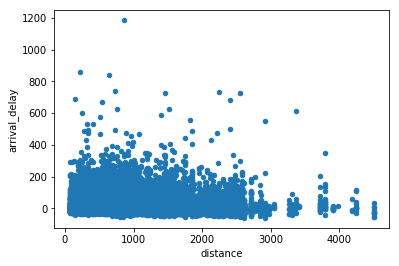

In [28]:
fl.plot(kind ='scatter', x='distance', y='arrival_delay')

In [30]:

oly = pd.read_csv('../data/oly.csv')
oly.info()
oly.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [81]:
pro = oly['Year']>1984
proly = oly[pro]
proly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,is medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,False
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,False
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,False


In [32]:
wo = oly['Sex']=="F"
woly = oly[wo]
woly.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [33]:
m = oly['Sex']=="M"
moly = oly[m]
moly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


In [34]:
med = oly['Medal']
no = med.isna()
allno = oly[no]
allno.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [35]:
nopro= allno['Year'] >1988
prono = allno[nopro]
prono.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [36]:
mll = oly[~no]
mll.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [37]:
oly['is medal'] = oly['Medal'].notna()
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,is medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,False


In [38]:
fpro = mll['Year'] >1984
prol = mll[fpro]
prol.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


In [39]:
su = mll['Season'] =='Summer'
suli = mll[su]
suli

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver


In [40]:
fpro = suli['Year'] >1984
prosu = suli[fpro]
prosu.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze


In [41]:
fe = suli['Sex'] == 'F'
feli = suli[fe]
feli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9442 entries, 79 to 271103
Data columns (total 15 columns):
ID        9442 non-null int64
Name      9442 non-null object
Sex       9442 non-null object
Age       9425 non-null float64
Height    8757 non-null float64
Weight    8667 non-null float64
Team      9442 non-null object
NOC       9442 non-null object
Games     9442 non-null object
Year      9442 non-null int64
Season    9442 non-null object
City      9442 non-null object
Sport     9442 non-null object
Event     9442 non-null object
Medal     9442 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 1.2+ MB


In [42]:
ma = suli['Sex'] == 'M'
mali = suli[ma]
mali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24646 entries, 3 to 271082
Data columns (total 15 columns):
ID        24646 non-null int64
Name      24646 non-null object
Sex       24646 non-null object
Age       23942 non-null float64
Height    17341 non-null float64
Weight    16931 non-null float64
Team      24646 non-null object
NOC       24646 non-null object
Games     24646 non-null object
Year      24646 non-null int64
Season    24646 non-null object
City      24646 non-null object
Sport     24646 non-null object
Event     24646 non-null object
Medal     24646 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.0+ MB


In [43]:
gr = mll.groupby(['Sex', 'Medal']).agg({'Age':'mean'}).round(1)
gr

Age
Sex Medal       
F   Bronze  24.7
    Gold    24.4
    Silver  24.4
M   Bronze  26.4
    Gold    26.5
    Silver  26.6

In [46]:
prosu.groupby('Sex').agg({'Age':'mean'}).round(1)
prosu.groupby(['Sex', 'Season']).agg({'Age':['min', 'max', 'mean']}).round(1)

Age            
             min   max  mean
Sex Season                  
F   Summer  13.0  52.0  25.1
M   Summer  14.0  61.0  26.1

In [45]:
prono.groupby(['Sex', 'Season']).agg({'Age':['min', 'max', 'mean', 'median']}).round(1)

Age                   
             min   max  mean median
Sex Season                         
F   Summer  12.0  62.0  24.5   24.0
    Winter  13.0  48.0  24.6   24.0
M   Summer  11.0  71.0  26.0   25.0
    Winter  14.0  55.0  25.8   25.0

In [51]:
befmed = mll['Year'] <1988
befol = mll[befmed]
befol.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [65]:
befolchart = befno.groupby(['Sex', 'Season']).agg({'Age':['median']}).round(1)
befolchart 

Age
           median
Sex Season       
F   Summer   21.0
    Winter   21.0
M   Summer   25.0
    Winter   24.0

In [66]:
prolchart= prol.groupby(['Sex', 'Season']).agg({'Age':['median']}).round(1)

In [54]:
prolchart

Age       
            mean median
Sex Season             
F   Summer  25.1   25.0
    Winter  25.6   25.0
M   Summer  26.1   25.0
    Winter  26.7   27.0

In [67]:
pronochart= prol.groupby(['Sex', 'Season']).agg({'Age':['median']}).round(1)
pronochart

Age
           median
Sex Season       
F   Summer   25.0
    Winter   25.0
M   Summer   25.0
    Winter   27.0

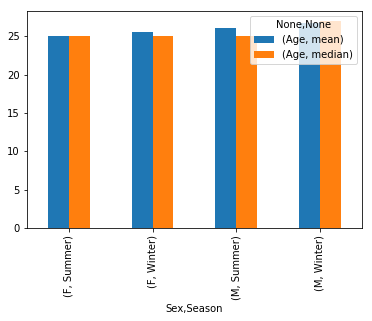

In [56]:
pronochart.plot(kind ='bar', use_index =True)

In [47]:
bef = allno['Year'] <1988
befno = allno[bef]
befno.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.5,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN


In [79]:
befnopiv=befno.pivot_table(index= 'Season', columns='Sex', values='Age', aggfunc = 'mean').round(1)
befnopiv

Sex,F,M
Season,,
Summer,21.8,26.9
Winter,22.0,25.0


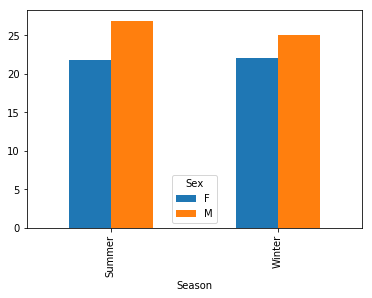

In [80]:
befnopiv.plot(kind ='bar', use_index =True)

In [68]:
befnochart = befno.groupby(['Sex', 'Season']).agg({'Age':['median']}).round(1)
befnochart 

Age
           median
Sex Season       
F   Summer   21.0
    Winter   21.0
M   Summer   25.0
    Winter   24.0

In [52]:
befnochart.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, (F, Summer) to (M, Winter)
Data columns (total 4 columns):
(Age, min)       4 non-null float64
(Age, max)       4 non-null float64
(Age, mean)      4 non-null float64
(Age, median)    4 non-null float64
dtypes: float64(4)
memory usage: 275.0+ bytes


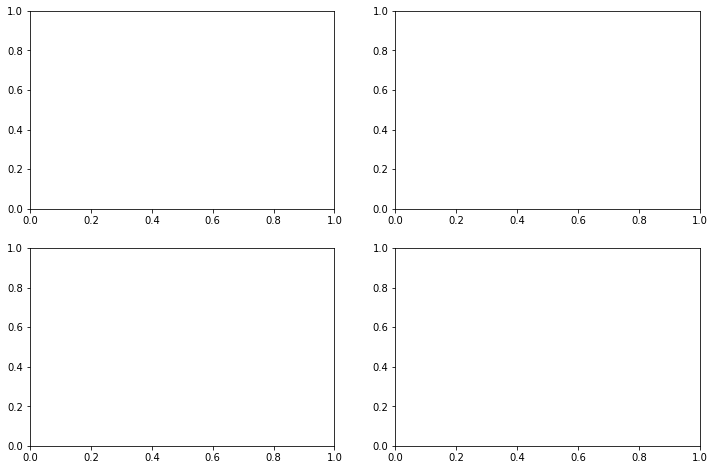

In [50]:
fig, ax_array = plt.subplots(2,2, figsize=(12,8))

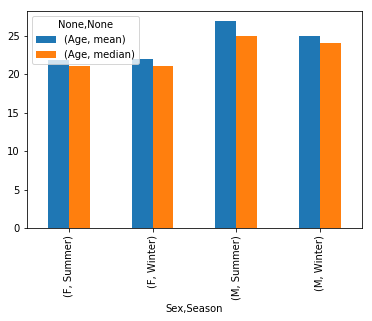

In [49]:
befnochart.plot(kind ='bar', use_index =True)

In [ ]:
prolchart.plot(kind='bar', colormap = , title="Winners post88")

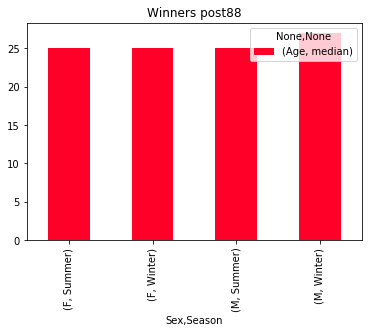

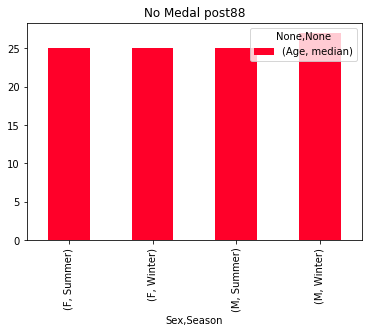

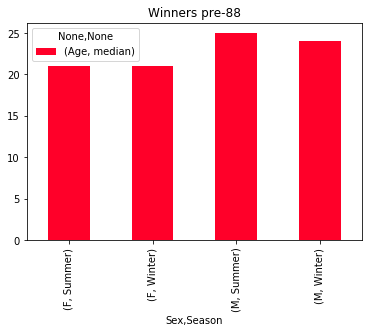

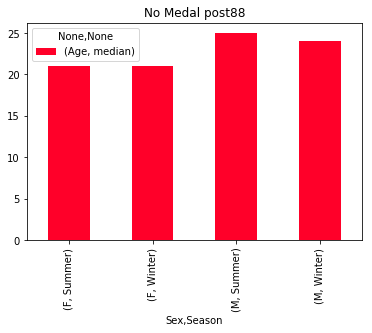

In [75]:
prolchart.plot(kind='bar', title="Winners post88")
pronochart.plot(kind='bar',title="No Medal post88")
befolchart.plot(kind='bar',title="Winners pre-88")
befnochart.plot(kind='bar', title="No Medal post88")

In [73]:
prolchart.plot(kind ='scatter', x='age', y='age', title="Winners post88")



KeyError: 'age'

In [70]:
prolchart.plot(kind='scatter',x=10, y=50, title="Winners post88")
pronochart.plot(kind='scatter',title="No Medal post88")
befolchart.plot(kind='scatter',title="Winners pre-88")
befnochart.plot(kind='scatter', title="No Medal post88")

ValueError: scatter requires an x and y column

In [3]:

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Changing the defaults for a scatterplot

The default plot is a line plot and uses the index as the x-axis. Each column of the frame become the y-values. This worked well for stock price data where the date was in the index and ordered. For many datasets, you will have to explicitly set the x and y axis variables. Below is a scatterplot comparison of carat vs price.

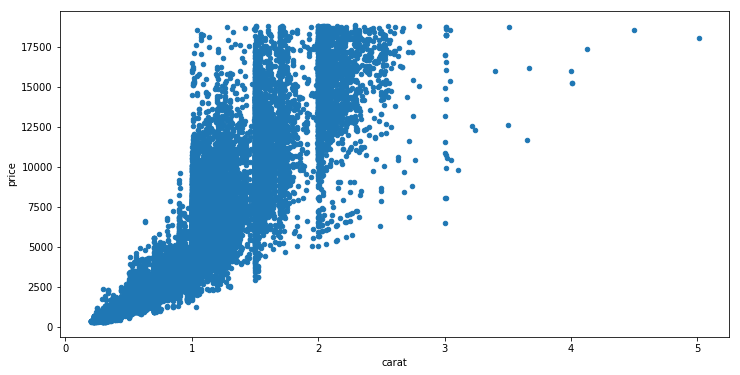

In [5]:
diamonds.plot('carat', 'price', kind='scatter', figsize=(12, 6));

In [ ]:
diamonds.shape

## Sample the data when too many points

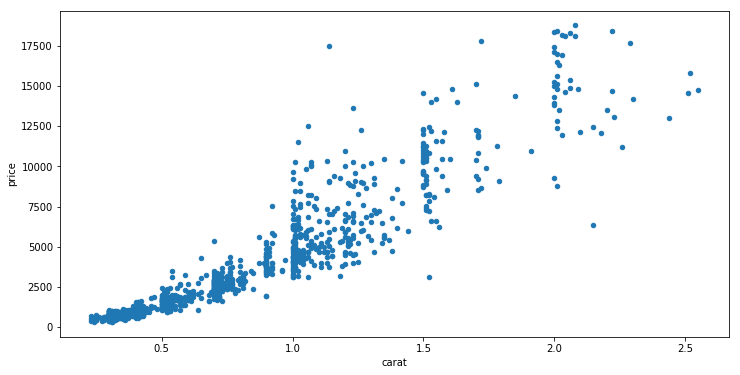

In [6]:
diamonds.sample(frac=.02).plot('carat', 'price', kind='scatter', figsize=(12, 6));

# If you have tidy data, use `groupby/pivot_table`, then make a bar plot
If your data is tidy like it is with this diamonds dataset, you will likely need to aggregate it with either a `groupby` or a `pivot_table` to make it work with a bar plot.

### The index becomes the tick labels for String Indexes
Pandas nicely integrates the index into plotting by using it as the tick mark labels for many plots.

In [ ]:
cut_count = diamonds['cut'].value_counts()
cut_count

In [ ]:
cut_count.plot(kind='bar')

### More than one grouping column in the index

In [ ]:
# bar plot with more than one category
cut_color_count = diamonds.groupby(['cut', 'color']).size()
cut_color_count.head(10)

In [ ]:
cut_color_count.plot(kind='bar')

## Thats quite ugly
Let's reshape and plot again.

In [7]:
cut_color_pivot = diamonds.pivot_table(index='cut', columns='color', aggfunc='size')
cut_color_pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


Plot the whole DataFrame. The index always goes on the x-axis. Each column value is the y-value and the column names are used as labels in the legend.

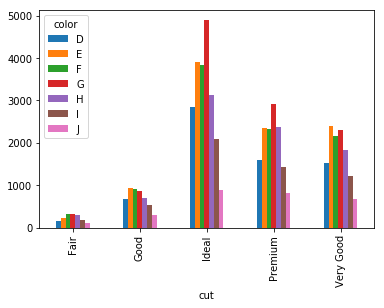

In [8]:
cut_color_pivot.plot(kind='bar')

## Pandas plots return matplotlib objects
After making a plot with pandas, you will see some text output immediately under the cell that was just executed. Pandas is returning to us the matplotlib Axes object. You can assign the result of the **`plot`** method to a variable.

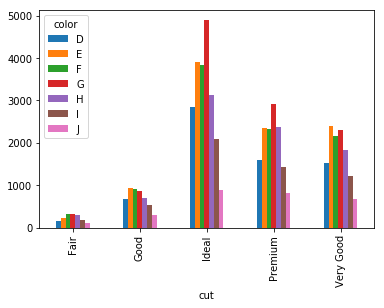

In [9]:
ax = cut_color_pivot.plot(kind='bar')

In [10]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

Get the figure as an attribute of the Axes

In [11]:
fig = ax.figure

In [12]:
type(fig)

matplotlib.figure.Figure

# We can use the figure and axes as normal

In [ ]:
ax.set_title('My new title on a Pandas plot')
fig

### Problem 1
<span  style="color:green; font-size:16px">In this problem we will test whether daily returns from stocks are normally distributed. Complete the following tasks:
* Take the `df_stocks` DataFrame and call the **`pct_change`** method to get the daily return percentage and assign it to a variable. 
* Assign the mean and standard deviation of each column (these will return Series) to separate variables. 
* Standardize your columns by subtracting the mean and dividing by the standard deviation. You have now produced a **z-score** for each daily return. 
* Add a column to this DataFrame called **`noise`** by calling **`np.random.randn`** which creates random normal variables.
* Plot the KDE for each column in your DataFrame. If the stock returns are normal, then the shapes of the curves will all look the same.
* Limit the xaxis to be between -3 and 3.
* Are stock retunrs normally distributed?</span>

### Problem 2
<span  style="color:green; font-size:16px">Use Pandas to plot a horizontal bar plot of diamond cuts.</span>

### Problem 3
<span  style="color:green; font-size:16px">Make a visualization that easily shows the differences in average salary by gender for each department of the employee dataset.</span>

### Problem 4
<span  style="color:green; font-size:16px">Split the employee data into two separate DataFrames. Those who have a hire date after the year 2000 and those who have one before. Make the same plot above for each group.</span>

### Problem 5
<span  style="color:green; font-size:16px">Use the **`flights`** data set. Plot the counts of the number of flights per day of week.</span>

### Problem 6
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week.</span>

### Problem 7
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week per airline.</span>

# Extra

## Scatterplot color based on a column - (unfortunately more difficult than it needs to be)
It is possible to use the value of a different column to change colors of the points. If you have a numeric column, then this is easy. Here, we create a numeric column with random integers from 0 to 100. We also pass a color map to the `cmap` parameter.

In [ ]:
# randomly sample
dia_samp = diamonds.sample(frac=.1)
dia_samp['some numeric col'] = np.random.randint(0, 100, len(dia_samp))

In [ ]:
dia_samp.plot(x='carat',
              y ='price',
              kind='scatter',
              title='Carat vs Price',
              c='some numeric col',
              cmap='plasma',
              figsize=(14, 6));

### Coloring with string columns - convert to 'category' data type
Working with strings isn't nearly as easy. One way to do this is to first convert the column to a Pandas category.

In [ ]:
dia_samp['clarity'] = dia_samp['clarity'].astype('category')

Let's verify the data types:

In [ ]:
dia_samp.dtypes

## The `cat` accessor
Pandas has a `cat` accessor for categorical columns. The `cat` accessor works just like `str` and `dt`. It gives you access to special categorical-only attributes and methods. One of these is `codes`. Each unique string is mapped to an integer.

In [ ]:
clarity_codes = dia_samp['clarity'].cat.codes
clarity_codes.head()

In [ ]:
dia_samp.plot(x='carat',
              y ='price',
              kind='scatter',
              title='Carat vs Price',
              c=clarity_codes,
              cmap='plasma',
              figsize=(14, 6));

### Alternative method - Make a new column of string color values with the `map` Series method
The **`map`** Series method iterates over a column of data and returns a single value for each cell.  **`map`** can accept a function or a dictionary. If a dictionary is passed then a simple key lookup is used to return the value.

In [ ]:
color_map = {'E': 'aqua',
             'I': 'green',
             'J': 'black',
             'H': 'cadetblue',
             'F': 'darksalmon',
             'G': 'lavender',
             'D': 'maroon'}

In [ ]:
dia_samp['color_map'] = dia_samp['color'].map(color_map).fillna('red')
dia_samp['color_map'].head()

Pass this Series to the **`c`** parameter.

In [ ]:
dia_samp.plot(x='carat',
              y ='price',
              kind='scatter',
              title='Carat vs Price',
              c=dia_samp['color_map'],
              figsize=(14, 6));